# **Assignment 9**

In [2]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [13]:
# Load datasets here once and assign to variables iris and boston
iris = ds.load_iris()

**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [11]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# list
target_names_list = list(iris.target_names)

display(iris_df.head())
print("Target names list:", target_names_list)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Target names list: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [12]:
# Features and target
X = iris.data
y = iris.target

# Fit kNN model with 5 neighbors
knn = KNN(n_neighbors=5)
knn.fit(X, y)

new_observations = [
    [5.1, 3.5, 1.4, 0.2],
    [6.3, 3.3, 6.0, 2.5]
]

# Predict encoded labels
predicted_labels = knn.predict(new_observations)

# Convert encoded labels to species names
predicted_species = [iris.target_names[i] for i in predicted_labels]

print("Predicted species:", predicted_species)


Predicted species: [np.str_('setosa'), np.str_('virginica')]


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [14]:
split = 0.25
neighbors = 5

# Features and labels
X = iris_df2[iris.feature_names]
y = iris_df2["species"]

# Train/test split using provided alias
X_train, X_test, y_train, y_test = tts(
    X, y, test_size=split, random_state=42, stratify=y
)

# Fit KNN model using provided alias
knn = KNN(n_neighbors=neighbors)
knn.fit(X_train, y_train)

# Accuracy on test data
test_accuracy = knn.score(X_test, y_test)
print(f"Test accuracy (k={neighbors}): {test_accuracy:.3f}")

Test accuracy (k=5): 0.974


The test has a 97.4% accuracy

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

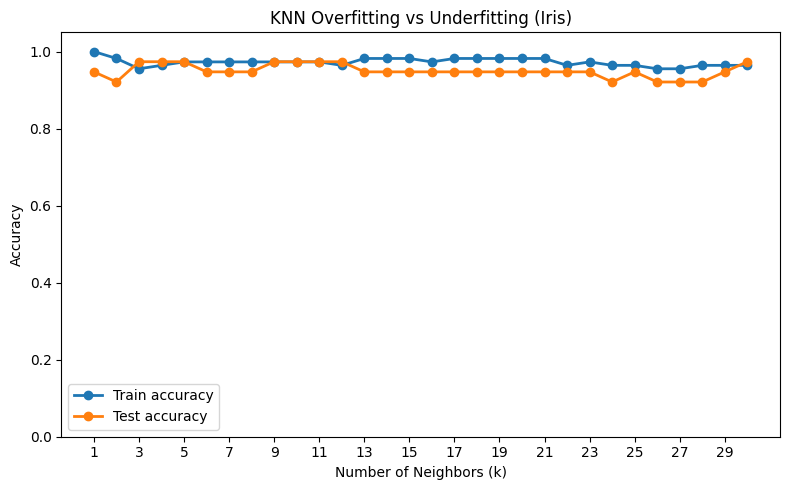

In [16]:
split = 0.25

X = iris_df2[iris.feature_names]
y = iris_df2["species"]

X_train, X_test, y_train, y_test = tts(
    X, y, test_size=split, random_state=42, stratify=y
)

k_values = range(1, 31)
train_scores = []
test_scores = []

for k in k_values:
    model = KNN(n_neighbors=k)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(k_values, train_scores, marker="o", linewidth=2, label="Train accuracy")
plt.plot(k_values, test_scores, marker="o", linewidth=2, label="Test accuracy")

plt.title("KNN Overfitting vs Underfitting (Iris)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")

plt.xticks(range(1, 31, 2))
plt.ylim(0.0, 1.05)
plt.legend(loc="best")

plt.tight_layout()
plt.show()